## Exemplo de Um Criptoativo: Bitcoin

In [70]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import poisson

O Mercado Bitcoin, maior corretora de criptomoedas da América Latina, disponibiliza uma [API pública](https://www.mercadobitcoin.com.br/api-doc/#method_trade_api_daysummary) onde é possível consultar o resumo diário de negociações realizadas para um dado criptoativo.


Realizando a seguinte [chamada](https://www.mercadobitcoin.net/api/BTC/day-summary/2022/6/29/) tem-se os dados de negociação (compra e venda) do criptoativo \textit{Bitcoin} (BTC) para o dia 29/06/2022. A partir do qual, é possível inferir o número de negociações realizadas para o dia solicitado, ou seja, \textbf{Taxa de Ocorrência} do evento \textbf{negociação do Bitcoin ao longo do dia}.

Assim, tem-se a seguinte equação:

\begin{equation}
\begin{cases}
     \mathbb{P}_X(X = x) = \frac{e^{-\lambda} \lambda^x}{x!}\\
     \mathbb{P}_X = \lambda\\
     \mathbb{V}_X = \lambda
\end{cases}
\end{equation}

Com:

\begin{equation}
\lambda = \frac{4649}{24} = 193.70833333333334\\ 
\end{equation}

Em que o numerador representa a quantidade total de transações do ativo e denomidar a quantidade de horas no dia, assim, temos a frequência com que o ativo é negociado em uma hora.

Agora, deseja-se inferir se em uma dada hora haverá, ao menos, 100 negociações do ativo Bitcoin:

In [66]:
n_sales = np.array(range(101))
prob = 1 - sum(poisson.pmf(k=n_sales, mu=193.70833333333334))
prob * 100

99.9999999999915

Temos $99\%$ de probabilidade com $\lambda = 193.70833333333334$ de que ocorram ao menos 100 transações de Bitcoin.

Agora, deseja-se simular se houvessem ao menos 100 transações a cada hora do dia, ou seja, $100 * 24 = 2400$ transações.

In [80]:
transactions_day = np.array(range(24001))
prob_transactions_day = poisson.rvs(mu=193.70833333333334, size=2400)

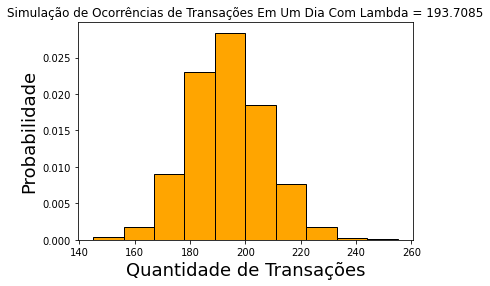

In [90]:
plt.ylabel("Probabilidade", fontsize="18")
plt.xlabel("Quantidade de Transações", fontsize="18")
plt.title("Simulação de Ocorrências de Transações Em Um Dia Com Lambda = 193.7085")
_ = plt.hist(prob_transactions_day, density=True, edgecolor="black", color="orange")